<a href="https://colab.research.google.com/github/SujithMMaddin/BudgetTracker/blob/main/TrendLens_Twitter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas matplotlib seaborn wordcloud

In [ ]:
import csv

with open('GenerativeAI tweets.csv', 'r', encoding='utf-8', errors='ignore') as infile, open('cleaned_tweets.csv', 'w', encoding='utf-8', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    for row in reader:
        try:
            writer.writerow(row)
        except:
            continue


In [ ]:
import pandas as pd
df = pd.read_csv('cleaned_tweets.csv')
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2023-04-19 21:27:19+00:00,1648800467206672384,From Studio Gangster to Synthetic Gangster 🎤.....,resembleai
1,1,2023-04-19 21:27:09+00:00,1648800425540476929,Took me some time to find this. I build this #...,devaanparbhoo
2,2,2023-04-19 21:26:57+00:00,1648800376479715328,Mind blowing next wave #generativeai platform...,timreha
3,3,2023-04-19 21:26:49+00:00,1648800341193027584,Open Source Generative AI Image Specialist Sta...,VirtReview
4,4,2023-04-19 21:25:00+00:00,1648799883934203905,Are you an #HR leader considering which future...,FrozeElle


In [ ]:
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2023-04-19 21:27:19+00:00,1648800467206672384,From Studio Gangster to Synthetic Gangster 🎤.....,resembleai
1,1,2023-04-19 21:27:09+00:00,1648800425540476929,Took me some time to find this. I build this #...,devaanparbhoo
2,2,2023-04-19 21:26:57+00:00,1648800376479715328,Mind blowing next wave #generativeai platform...,timreha
3,3,2023-04-19 21:26:49+00:00,1648800341193027584,Open Source Generative AI Image Specialist Sta...,VirtReview
4,4,2023-04-19 21:25:00+00:00,1648799883934203905,Are you an #HR leader considering which future...,FrozeElle


In [ ]:
print(df.shape)


(56221, 5)


In [ ]:
print(df.columns)
print(df.info())
print(df.head(10))

Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Username'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56221 entries, 0 to 56220
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56221 non-null  int64 
 1   Datetime    56221 non-null  object
 2   Tweet Id    56221 non-null  int64 
 3   Text        56221 non-null  object
 4   Username    56221 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.1+ MB
None
   Unnamed: 0                   Datetime             Tweet Id  \
0           0  2023-04-19 21:27:19+00:00  1648800467206672384   
1           1  2023-04-19 21:27:09+00:00  1648800425540476929   
2           2  2023-04-19 21:26:57+00:00  1648800376479715328   
3           3  2023-04-19 21:26:49+00:00  1648800341193027584   
4           4  2023-04-19 21:25:00+00:00  1648799883934203905   
5           5  2023-04-19 21:23:39+00:00  1648799544375754754   
6           6  2023-

In [ ]:
df.isnull()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
56216,False,False,False,False,False
56217,False,False,False,False,False
56218,False,False,False,False,False
56219,False,False,False,False,False


In [ ]:
import re

def clean_tweet(tweet):
    tweet = re.sub(r"http\S+", "", tweet)  # remove URLs
    tweet = re.sub(r"@\w+", "", tweet)     # remove mentions
    tweet = re.sub(r"#", "", tweet)        # remove hashtag symbol
    tweet = re.sub(r"[^\w\s]", "", tweet)  # remove punctuation
    tweet = re.sub(r"\d+", "", tweet)      # remove numbers
    tweet = tweet.lower().strip()          # lowercase and trim
    return tweet

df['cleaned_content'] = df['Text'].apply(clean_tweet)


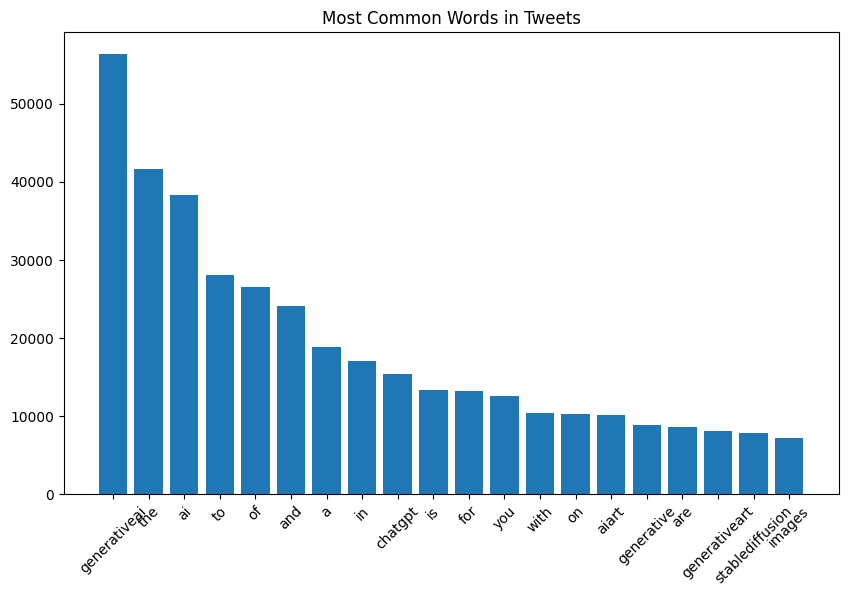

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Most common words
all_words = ' '.join(df['cleaned_content']).split()
word_freq = Counter(all_words).most_common(20)

# Plot
words, counts = zip(*word_freq)
plt.figure(figsize=(10,6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Most Common Words in Tweets")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


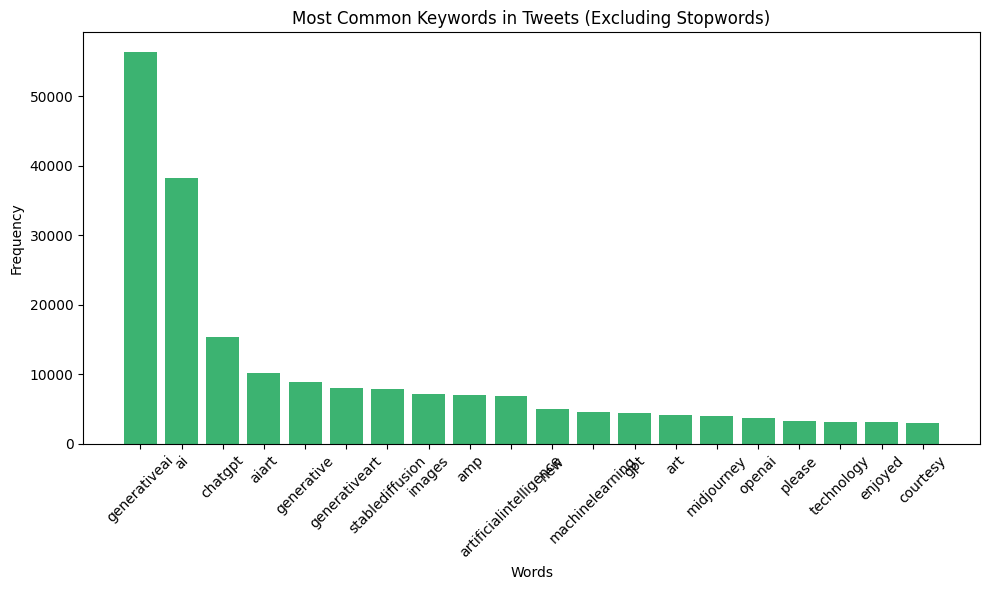

In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download stopwords (if not already)
nltk.download('stopwords')

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Extract and clean all words from the 'cleaned_content' column
all_words = ' '.join(df['cleaned_content']).lower().split()

# Remove stopwords and non-alphabetic words
filtered_words = [word for word in all_words if word.isalpha() and word not in stop_words]

# Count word frequencies
word_freq = Counter(filtered_words).most_common(20)

# Plot
words, counts = zip(*word_freq)
plt.figure(figsize=(10,6))
plt.bar(words, counts, color='mediumseagreen')
plt.xticks(rotation=45)
plt.title("Most Common Keywords in Tweets (Excluding Stopwords)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['cleaned_content'].apply(get_sentiment)


In [ ]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)


In [ ]:
print(df['sentiment_category'].value_counts())


sentiment_category
Positive    29156
Neutral     21682
Negative     5383
Name: count, dtype: int64


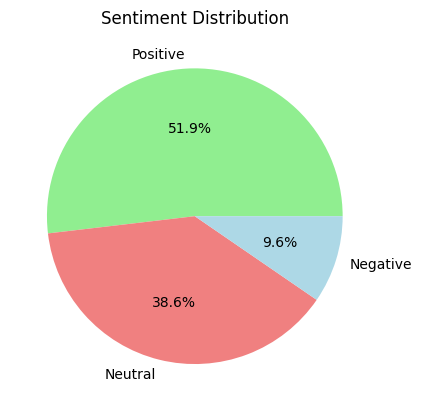

In [ ]:
import matplotlib.pyplot as plt

df['sentiment_category'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()


In [ ]:
# Tell pandas to show full column width
pd.set_option('display.max_colwidth', None)

In [ ]:
# Show a few tweets from each category
for category in ['Positive', 'Neutral', 'Negative']:
    print(f"\nSample {category} tweets:\n")
    print(df[df['sentiment_category'] == category]['Text'].head(3).to_string(index=False))



Sample Positive tweets:

#GenerativeAI is a new technology that can create new text, images, and other creative content from scratch. It is still under development but has the potential to revolutionize many industries. Watch the video in the article to learn more on GenerativeAI https://t.co/dzNahX5jzw
             Salesforce announces plans to integrate Einstein GPT and data cloud with its flow workflow automation suite. How natural language prompts will trigger actions based on real-time #data insights: #GenerativeAI #automation #analytics @salesforce https://t.co/GO1e5nS6qR
                                            Discover the limitless possibilities of #GenerativeAI as it:\n\n💪 Elevates customer experiences\n🚗 Ignites innovation\n📊 Creates competitive advantages\n\nLearn more in this article by @CIOonline: https://t.co/o1oNlkNOAr\n\n#iwork4dell

Sample Neutral tweets:

From Studio Gangster to Synthetic Gangster 🎤... we investigate how we suspect the #ghostwriter created the Dr

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # remove links
    text = re.sub(r"@\w+", "", text)     # remove mentions
    text = re.sub(r"#\w+", "", text)     # remove hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = text.lower()  # lowercase
    text = " ".join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

df['cleaned_text'] = df['Text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


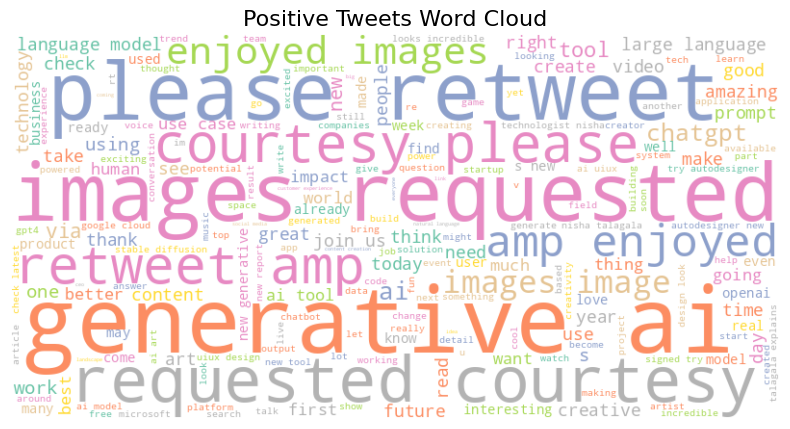

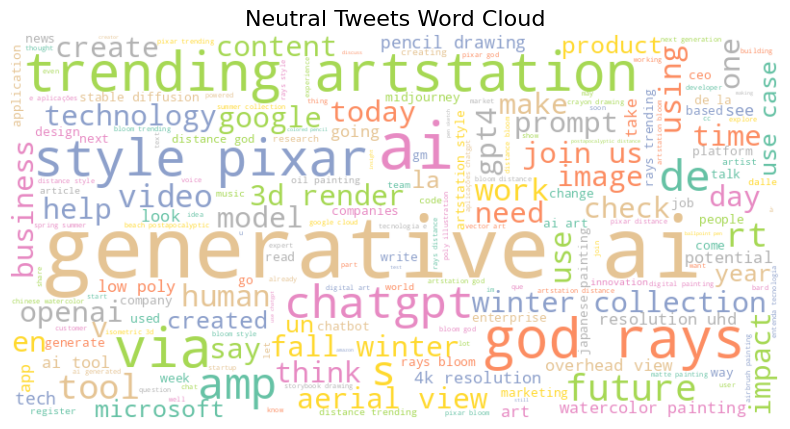

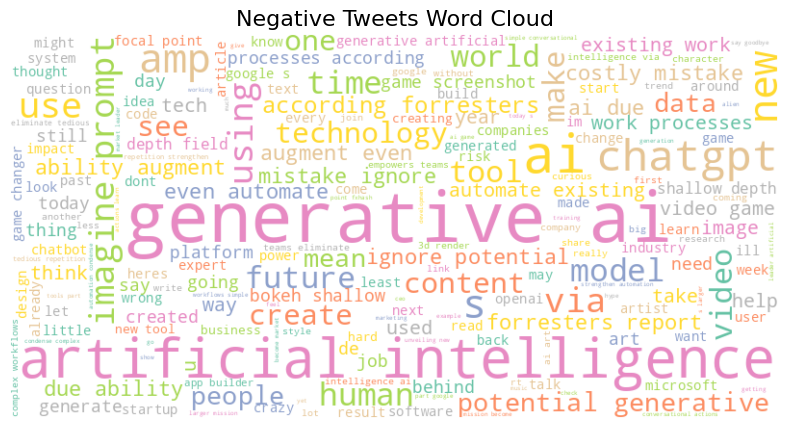

In [ ]:
from wordcloud import WordCloud

sentiments = ['Positive', 'Neutral', 'Negative']

for sentiment in sentiments:
    text = " ".join(df[df['sentiment_category'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{sentiment} Tweets Word Cloud", fontsize=16)
    plt.show()
